In [12]:
from torch.utils.data.dataset import Dataset


class NiftiDataset(Dataset):
    def __init__(self, source_dir, target_dir = None, transforms=None):
        # fill this in
        """
        Args:
            source_dir (string): Directory above t1 and t2 images.
            target_dir (string): Directory to save output.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
#        self.source_dir = source_dir
        self.target_dir = target_dir
        self.transforms = transforms
        
        self.t1_dir = os.path.join(source_dir, 't1')
        self.t2_dir = os.path.join(source_dir, 't2')
        
        self.t1_fns = sorted(glob(os.path.join(t1_dir, '*.nii*')))
        self.t2_fns = sorted(glob(os.path.join(t2_dir, '*.nii*')))
        assert len(self.t1_fns) == len(self.t2_fns) and len(self.t1_fns) != 0

    def __len__(self):
        # fill this in
        #ensure the t1 and t2 image numbers are equal, return the number of images of t1
        assert len(self.t1_fns) == len(self.t2_fns) and len(self.t1_fns) != 0
        return len(self.t1_fns)

    def __getitem__(self, idx):
        # fill this in
        # get the t1 and t2 image of idx from the image list
        #return t1 and t2 data
        self.t1_ex, self.t2_ex = nib.load(self.t1_fns[idx]).get_fdata(), nib.load(self.t2_fns[idx]).get_fdata()
        return self.t1_ex, self.t2_ex



In [44]:
class RandomCrop3D:
      
    def __init__(self, output_size):
        #accept int or tuple
        #if int n, output n x n
        #tuple (m x n)
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size, output_size)
        else:
            assert len(output_size) == 3
            self.output_size = output_size

    def __call__(self, sample):
        #sample is tuple of t1 and t2 image data
        t1, t2 = sample

        h, w, d = t1.shape[:]
        new_h, new_w, new_d = self.output_size

        h_offset = np.random.randint(0, h - new_h)
        w_offset = np.random.randint(0, w - new_w)
        d_offset = np.random.randint(0, d - new_d)
        
        new_t1 = t1[h_offset: h_offset + new_h, w_offset: w_offset + new_w, d_offset: d_offset + new_d]
        new_t2 = t2[h_offset: h_offset + new_h, w_offset: w_offset + new_w, d_offset: d_offset + new_d]

        return new_t1, new_t2



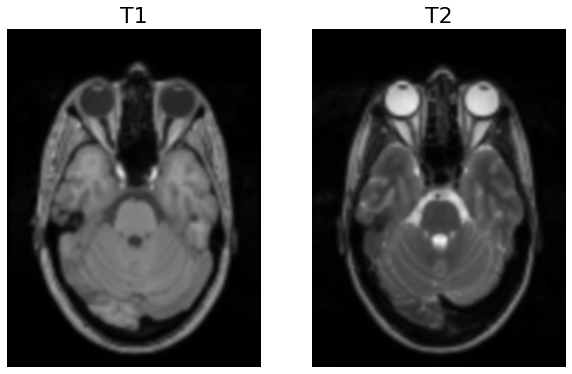

In [14]:
import nibabel as nib
%matplotlib inline
from matplotlib import pyplot as plt
import os
import random
from glob import glob

train_dir = './small'
t1_dir = os.path.join(train_dir, 't1')
t2_dir = os.path.join(train_dir, 't2')

nft_dataset = NiftiDataset(source_dir = train_dir)

t1_ex, t2_ex = nft_dataset[0]
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(t1_ex[:,60,:], cmap='gray', interpolation="bicubic"); ax1.set_title('T1',fontsize=22); ax1.axis('off'); 
ax2.imshow(t2_ex[:,60,:], cmap='gray', interpolation="bicubic"); ax2.set_title('T2',fontsize=22); ax2.axis('off'); 

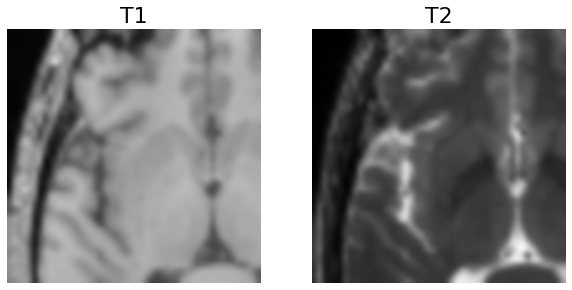

In [48]:
import numpy as np
crop = RandomCrop3D(50)
c1, c2 = crop(nft_dataset[3] )

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(c1[:,10,:], cmap='gray', interpolation="bicubic"); ax1.set_title('T1',fontsize=22); ax1.axis('off'); 
ax2.imshow(c2[:,10,:], cmap='gray', interpolation="bicubic"); ax2.set_title('T2',fontsize=22); ax2.axis('off'); 

In [51]:
(1,) + (3,) + (6,)

(1, 3, 6)

In [54]:
a = np.zeros((2,3))

In [55]:
a.shape

(2, 3)

In [57]:
*cs, h, w = a.shape

In [58]:
cs

[]

In [59]:
len(cs)

0